# Import Libraries

In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

# Data Analysis

In [2]:
train = pd.read_csv("cs_training.csv")
test = pd.read_csv("cs_test.csv")

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [4]:
train.shape

(85542, 12)

In [5]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,85542.000000,85542.000000,85541.000000,85541.000000,85541.000000,85541.000000,6.856200e+04,85541.000000,85541.000000,85541.000000,85541.000000,83286.000000
mean,42771.500000,0.066342,6.082451,52.232999,0.429069,360.423280,6.634861e+03,8.433406,0.274979,1.017945,0.248255,0.757402
std,24693.992701,0.248880,274.946697,14.767260,4.292155,2246.542169,1.416657e+04,5.142341,4.268641,1.130855,4.255893,1.115621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21386.250000,0.000000,0.029795,41.000000,0.000000,0.174685,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,42771.500000,0.000000,0.155644,52.000000,0.000000,0.366497,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,64156.750000,0.000000,0.562272,63.000000,0.000000,0.869022,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,85542.000000,1.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85542 entries, 0 to 85541
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            85542 non-null  int64  
 1   SeriousDlqin2yrs                      85542 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  85541 non-null  float64
 3   age                                   85541 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  85541 non-null  float64
 5   DebtRatio                             85541 non-null  float64
 6   MonthlyIncome                         68562 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       85541 non-null  float64
 8   NumberOfTimes90DaysLate               85541 non-null  float64
 9   NumberRealEstateLoansOrLines          85541 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  85541 non-null  float64
 11  NumberOfDepende

In [7]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        1
age                                         1
NumberOfTime30-59DaysPastDueNotWorse        1
DebtRatio                                   1
MonthlyIncome                           16980
NumberOfOpenCreditLinesAndLoans             1
NumberOfTimes90DaysLate                     1
NumberRealEstateLoansOrLines                1
NumberOfTime60-89DaysPastDueNotWorse        1
NumberOfDependents                       2256
dtype: int64

In [8]:
test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

## Target distribution

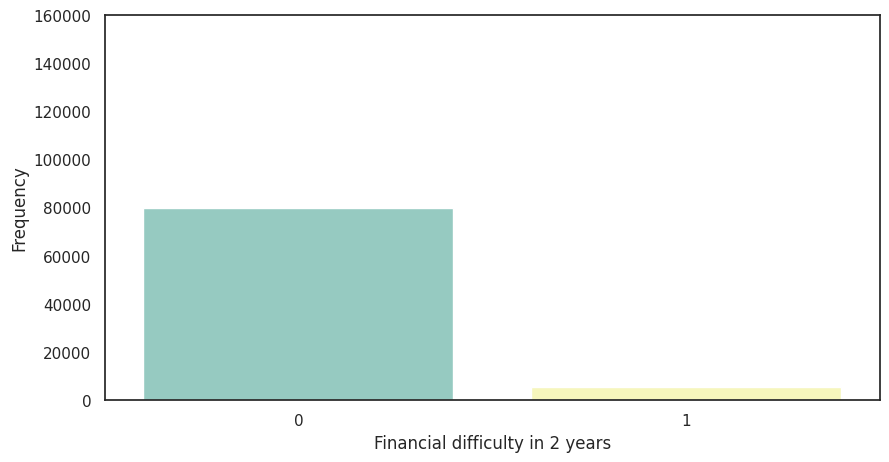

In [9]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

## Merging datasets

In [10]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [11]:
dataset.shape

(187045, 12)

In [12]:
dataset = dataset.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train = train.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

test = test.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

## Exploring variables

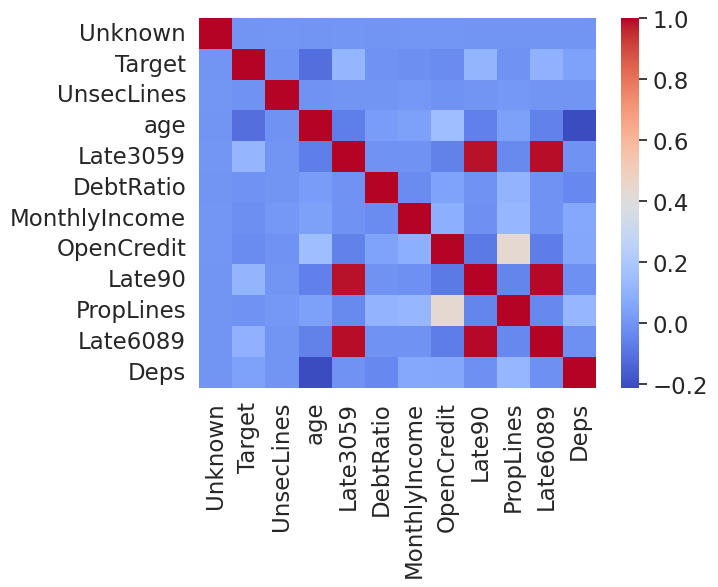

In [13]:
# Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

## Exploring UnsecLines

In [14]:
dataset.UnsecLines.describe()

count    187044.000000
mean          5.663266
std         235.483461
min           0.000000
25%           0.029955
50%           0.153930
75%           0.563339
max       50708.000000
Name: UnsecLines, dtype: float64

In [15]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes

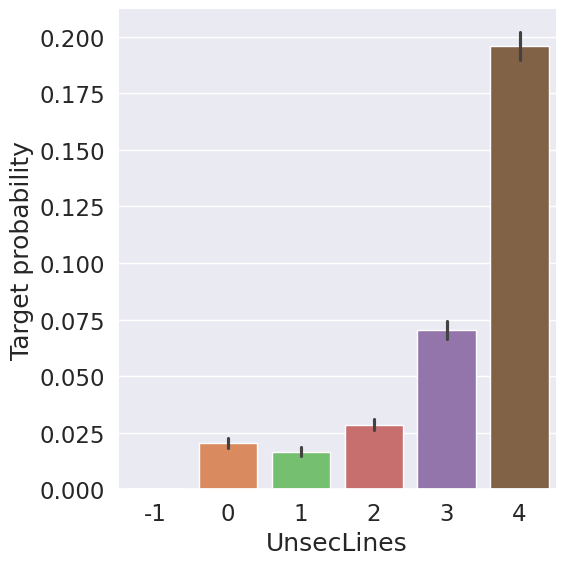

In [16]:
g  = sns.catplot(x="UnsecLines",y="Target",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring Age

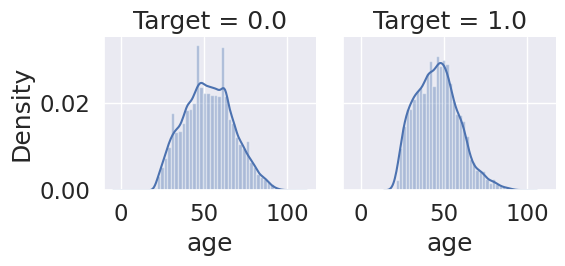

In [17]:
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "age")

In [18]:
dataset.age = pd.qcut(dataset.age.values, 5).codes

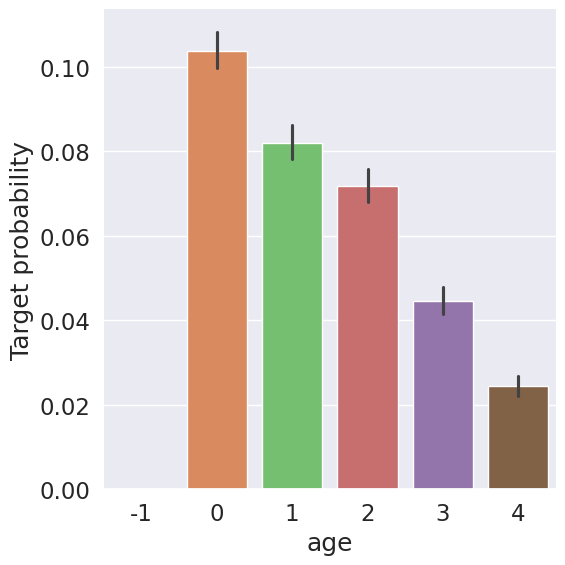

In [19]:
g  = sns.catplot(x="age",y="Target",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring DebtRatio

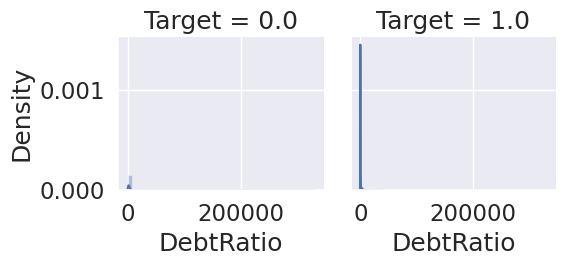

In [20]:
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "DebtRatio")

In [21]:
dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values, 5).codes

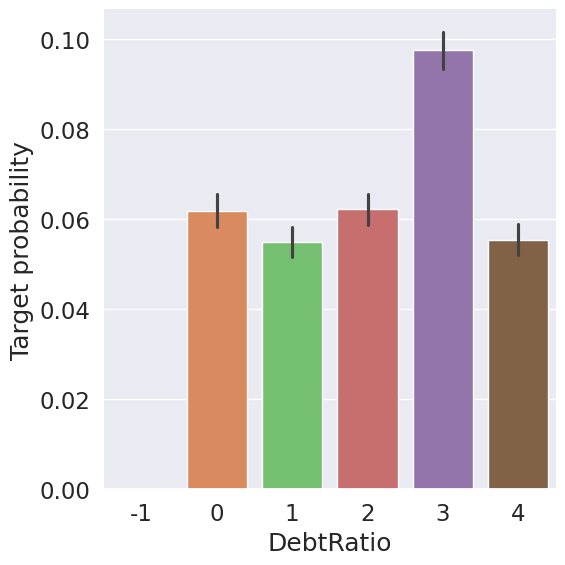

In [22]:
g  = sns.catplot(x="DebtRatio",y="Target",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

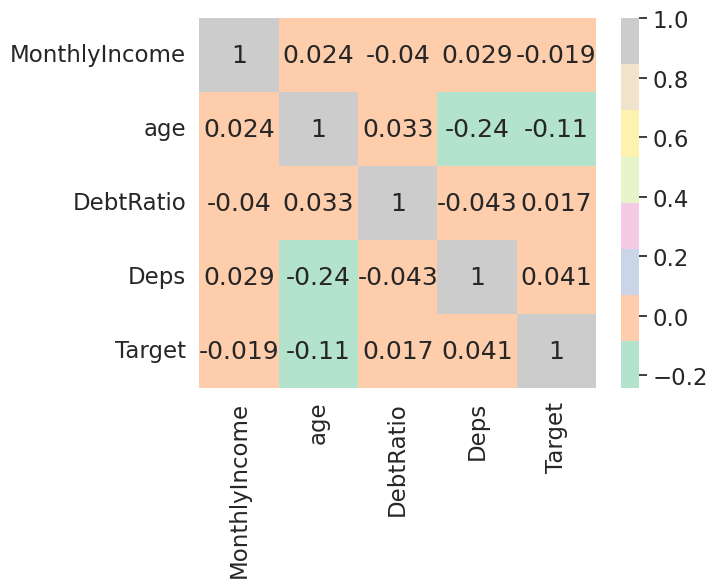

In [23]:
g = sns.heatmap(dataset[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="Pastel2",annot=True)

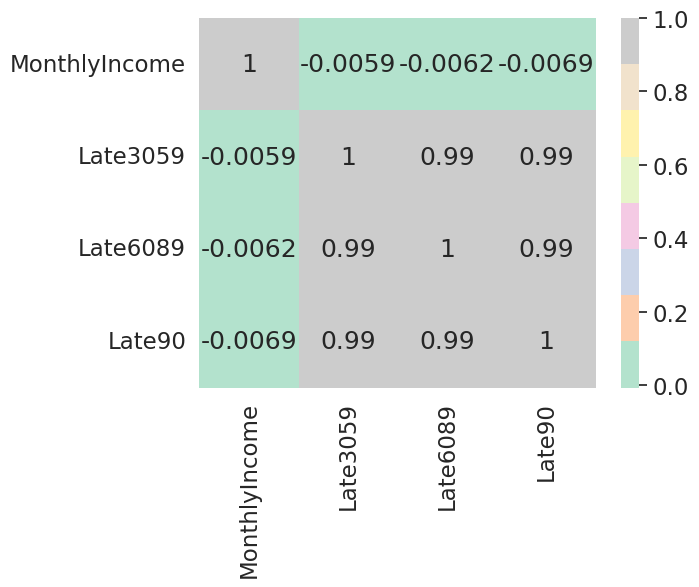

In [24]:
g = sns.heatmap(dataset[["MonthlyIncome","Late3059","Late6089","Late90"]].corr(),cmap="Pastel2",annot=True)

In [25]:
dataset.MonthlyIncome.median()

5400.0

In [26]:
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

In [29]:
import pandas as pd

# Assuming dataset is your DataFrame containing the data
dataset['MonthlyIncome'] = pd.qcut(dataset['MonthlyIncome'], 5, labels=False, duplicates='drop')

# This will assign codes to the 'MonthlyIncome' column based on quantile bins


## Exploring OpenCredit

In [30]:
dataset.OpenCredit.describe()

count    187044.000000
mean          8.444318
std           5.143292
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: OpenCredit, dtype: float64

In [31]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

## Final NaN check

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187045 entries, 0 to 187044
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unknown        187045 non-null  int64  
 1   Target         85542 non-null   float64
 2   UnsecLines     187045 non-null  int8   
 3   age            187045 non-null  int8   
 4   Late3059       187044 non-null  float64
 5   DebtRatio      187045 non-null  int8   
 6   MonthlyIncome  187045 non-null  int64  
 7   OpenCredit     187045 non-null  int8   
 8   Late90         187044 non-null  float64
 9   PropLines      187044 non-null  float64
 10  Late6089       187044 non-null  float64
 11  Deps           182163 non-null  float64
dtypes: float64(6), int64(2), int8(4)
memory usage: 12.1 MB


In [33]:
dataset.head()

,Unknown,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1,1.0,4,1,2.0,3,3,4,0.0,6.0,0.0,2.0
1,2,0.0,4,1,0.0,0,0,0,0.0,0.0,0.0,1.0
2,3,0.0,3,0,1.0,0,0,0,1.0,0.0,0.0,0.0
3,4,0.0,2,0,0.0,0,0,1,0.0,0.0,0.0,0.0
4,5,0.0,4,2,1.0,0,3,2,0.0,1.0,0.0,0.0


Building dummy variables

In [34]:
dataset = pd.get_dummies(dataset, columns = ["UnsecLines"], prefix="UnsecLines")
dataset = pd.get_dummies(dataset, columns = ["age"], prefix="age")
dataset = pd.get_dummies(dataset, columns = ["Late3059"], prefix="Late3059")
dataset = pd.get_dummies(dataset, columns = ["DebtRatio"], prefix="DebtRatio")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["OpenCredit"], prefix="OpenCredit")
dataset = pd.get_dummies(dataset, columns = ["Late90"], prefix="Late90")
dataset = pd.get_dummies(dataset, columns = ["PropLines"], prefix="PropLines")
dataset = pd.get_dummies(dataset, columns = ["Late6089"], prefix="Late6089")
dataset = pd.get_dummies(dataset, columns = ["Deps"], prefix="Deps")

In [35]:
dataset.head()

,Unknown,Target,UnsecLines_-1,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_-1,age_0,age_1,age_2,age_3,age_4,Late3059_0.0,Late3059_1.0,Late3059_2.0,Late3059_3.0,Late3059_4.0,Late3059_5.0,Late3059_6.0,Late3059_7.0,Late3059_8.0,Late3059_9.0,Late3059_10.0,Late3059_11.0,Late3059_12.0,Late3059_13.0,Late3059_19.0,Late3059_96.0,Late3059_98.0,DebtRatio_-1,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,OpenCredit_-1,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0.0,Late90_1.0,Late90_2.0,...,PropLines_4.0,PropLines_5.0,PropLines_6.0,PropLines_7.0,PropLines_8.0,PropLines_9.0,PropLines_10.0,PropLines_11.0,PropLines_12.0,PropLines_13.0,PropLines_14.0,PropLines_15.0,PropLines_16.0,PropLines_17.0,PropLines_18.0,PropLines_19.0,PropLines_20.0,PropLines_21.0,PropLines_23.0,PropLines_25.0,PropLines_26.0,PropLines_29.0,PropLines_37.0,PropLines_54.0,Late6089_0.0,Late6089_1.0,Late6089_2.0,Late6089_3.0,Late6089_4.0,Late6089_5.0,Late6089_6.0,Late6089_7.0,Late6089_8.0,Late6089_9.0,Late6089_11.0,Late6089_96.0,Late6089_98.0,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0,Deps_5.0,Deps_6.0,Deps_7.0,Deps_8.0,Deps_9.0,Deps_10.0,Deps_20.0,Deps_43.0
0,1,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
dataset.shape

(187045, 121)

In [37]:
train = dataset[:train_len]
Kaggle_test = dataset[train_len:]
Kaggle_test.drop(labels=["Target"],axis = 1,inplace=True)

In [38]:
Kaggle_test.shape

(101503, 120)

In [39]:
train["Target"] = train["Target"].astype(int)
Y_train = train["Target"]
X_train = train.drop(labels = ["Target", "Unknown"],axis = 1)

In [40]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [41]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [42]:
parameters = {'n_estimators': 1000, 'random_state' : 20}

model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=20)

In [43]:
test.head()

,Unknown,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [44]:
results_df = pd.read_csv("cs_test.csv")

In [45]:
results_df = results_df.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)

In [46]:
DefaultProba = model.predict_proba(Kaggle_test.drop(["Unknown"], axis=1))
DefaultProba = DefaultProba[:,1]
results_df.SeriousDlqin2yrs = DefaultProba

results_df = results_df.rename(columns={'Unnamed: 0': 'Id',
                                        'SeriousDlqin2yrs': 'Probability'})

In [47]:
results_df.head()

,Id,Probability
0,1,0.006263
1,2,0.067586
2,3,0.000000
3,4,0.042617
4,5,0.122277


In [48]:
results_df.to_csv("Credit_score_dataset.csv", index=False)